  # Граф видимости и планирование движения

## Нахождение любого пути между точками с препятствиями

Для начала рассмотрим движение материальной точки.<br>
<img src="trap_map.png" style="float: right; width: 250px" />
Эту задачу можно решить с помощью трапецоидной карты. По ней строится граф, ребра которого соединяют центры трапедоидов, а также начальную и конечную вершины с серединами вертикальных сторон трапецоидов. В таком графе ищется путь между начальной и конечной вершинами.<br>
Если точки лежат внутри одного трапецоида — ответ найден. Иначе идём из стартовой точки в центр её трапецоида, далее по построенным рёбрам ищем трапецоид содержащий финальную точку. Для этого можно использовать поиск в ширину или другой алгоритм нахождения кратчайшего пути в графе. В итоге мы соединяем середину последнего трапецоида с конечной вершиной.<br>
Данный алгоритм работает за $O(n \log n)$ и за линейное количество памяти и хорошо подходит для нахождения какого-нибудь пути между парой данных вершин. Но если нужно найти кратчайший путь, этот алгоритм не подходит, хоть и работает быстро. Однако, решения нахождения кратчайшего пути в лучшем случае работают за $O(n^2)$ времени и памяти (здесь и далее n — количество всех вершин).


## Нахождение кратчайшего пути между точками с препятствиями

### Граф видимости
Рассмотрим точное решение нахождения кратчайшего пути на плоскости между двумя точками с полигональными препятствиями с помощью построения графа видимости. После его построения, как и в случае с трапецоидной картой, кратчайший путь ищется любым стандартным алгоритмом поиска (например, алгоритмом Дейкстры).<br>
Для простоты рассуждений начальную и конечную вершины будем считать вершинами полигонов.

<img src="short_cut.png" style="float: right; width: 250px" />
**Лемма (о кратчайшем пути)**<br>
*Любой кратчайший путь между двумя вершинами с полигональными препятствиями представляет собой ломаную, вершины которой — вершины полигонов.*<br>
$\triangleright$<br><div style="padding-left:40px">
Пусть кратчайший путь — не ломаная. В таком случае, на пути существует такая точка p, которая не принадлежит ни одному прямому отрезку. Это означает, что существует $\varepsilon$-окрестность точки p, в которую не попадает ни одно препятствие (случай, когда точка попала на ребро рассматривается аналогично). В таком случае, подпуть, который находится внутри $\varepsilon$-окрестности, по неравенству треугольника может быть сокращён по хорде, соединяющий точки пересечения границы $\varepsilon$-окрестности с путем. Раз часть пути может быть уменьшена, значит и весь путь может быть уменьшен, а значит исходное предположение некорректно.<br>
</div>$\triangleleft$

**Определение:**<br>
Говорят, что вершина $u$ *видна* из $v$, если отрезок $uv$ не пересекает ни одного препятствия.

**Определение:**<br>
*Граф видимости* (англ. visibility graph) — граф, вершины которого — вершины полигонов. Между вершинами $u$ и $v$ существует ребро, если из $u$ *видна* $v$.<br>

В худшем случае в таком графе может быть $O(n^2)$ ребер. Однако по некоторым ребрам кратчайший путь точно не пройдет, и такие ребра из графа можно удалить.

<img src="delete_edge.png" style="float: right; width: 150px" />
**Лемма (о неиспользуемых вершинах)**<br>
* *Если существуют вершины $A$, $B$, $C$ одного препятствия и вершина $D$ такая, что поворот $DBA$ не совпадает с поворотом $DBC$, то ребро $DB$ не принадлежит кратчайшему пути и его можно удалить из графа. (См. поясняющую картинку справа)*
* *Все внутренние вершины, кроме вырожденного случая, (начальная/конечная точка лежит внутри выпуклой оболочки фигуры) можно игнорировать.*<br>

$\triangleright$<br><div style="padding-left:40px">
* Путь проходящий через ребро $BD$ будет длиннее, чем через соседей точки $B$, так как по неравенству треугольника $AB + BD > AD$
* Если случай не вырожденный, значит заход внутрь фигуры только увеличит суммарный путь, так как по неравенству треугольника расстояние между соседними выпуклыми вершинами всегда меньше суммы расстояний с учётом внутренней.<br>
</div>$\triangleleft$<br>

По доказанным выше леммам любое ребро кратчайшего пути содержится в графе. Таким образом, для нахождения кратчайшего пути осталось найти кратчайший путь в этом графе от начальной до конечной вершины.

## Построение графа видимости

### Наивный алгоритм $(O(n ^ 3))$
Для каждой пары вершин проверяем, можно ли добавить ребро между ними, то есть нет ли пересечений с полигонами. $O(n^2)$ пар вершин и $O(n)$ ребер, то есть $O(n^3)$.<br>
Ниже представлена визуализация алгоритма для двух выпуклых полигонов.

/home/topayevtimur/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


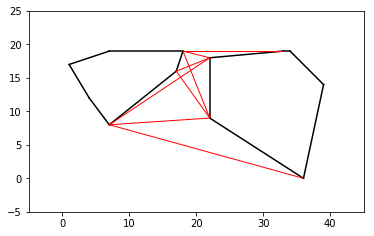

Accepted


In [1]:
from naive_algorithm import *

def build_graph_naive(first_polygon, second_polygon):
    
    # Здесь читателю прдлагается релизовать наивное построение графа видимости
    # Лемму о неиспользуемых вершинах НУЖНО игнорировать
    
    # first_polygon, second_polygon - массивы точек, образующие полигоны
    
    # нужно вернуть массив пар точек между которыми есть ребра в графе видимости
    
    return naive_algorithm(first_polygon, second_polygon) # заглушка

naive_task(build_graph_naive) 

### Построение заметающим лучом $(O(n ^ 2 \log n))$
<img src="zamrefr_1.png" style="float: right; width: 150px" />
<img src="zamrefr_2.png" style="float: right; width: 150px" />
<img src="zamrefr_3.png" style="float: right; width: 150px" />
Идея алгоритма проста: для каждой вершины найдем видимые из нее вершины. Если научиться делать это за $O(n \log  n)$, задача решена, так как всего точек $n$.<br>

Для каждой вершины будем рассматривать только правую половину плоскости, так как ребра, которые должны идти в левую половину, будут исходить из вершин, для которых текущая вершина будет справа.<br>

*Переформулируем задачу.*<br>
*Дано:* точка $v$ и множество отрезков — ребер препятствий.<br> 
*Найти:* множество концов отрезков, видимых из $v$.<br>

Для решения этой задачи будем использовать заметающий луч с началом в точке $v$. Его статусом будут отрезки, которые его пересекают, упорядоченные по возрастанию расстояния от точки $v$ до точки пересечения. Точками событий будут концы отрезков.<br>
Пустим луч из рассматриваемой вершины $v$ вертикально вверх и добавим в статус все отрезки, которые он пересекает, по увеличению расстояния до них. Теперь будем рассматривать точки $w \in V$ в порядке сортировки по углу между $v$ и вертикальной полуосью $l$. При таком обходе для проверки видимости вершины достаточно проверить пересечение с ближайшим к $v$ отрезком, то есть первым в статусе(так как отрезки отсортированы по расстоянию до них). Действительно, если вершина $w$ не видна, то отрезок $vw$ пересекает несколько отрезков, лежащих перед $w$, а значит и ближайший. В противном случае все пересекаемые лучом отрезки лежат за вершиной $w$ и пересечения отрезка $vw$ с ближайшим отрезком не будет. Вне зависимости от видимости вершины, необходимо изменить статус заметающего луча. Для этого необходимо удалить из статуса все отрезки, которые заканчиваются вершине $w$ (лежат слева от прямой $vw$) и добавить все отрезки, которые в ней начинаются (лежат справа от прямой $vw$).<br>

В качестве статуса нужно использовать структуру данных, позволяющую добавлять и удалять из нее отрезки за $O(\log n)$ и извлекать минимум за $O(1)$ или $O(\log n)$. В этом случае достигается асимптотика $O(n^2 \log n)$, так как для каждой из $n$ точек выполняется сортировка за $O(n \log n)$, обновление статуса (суммарно $O(n \log n)$, так как каждый отрезок добавляется и удаляется из статуса не более одного раза) и запросы ближайшего отрезка ($O(\log n)$ или $O(1)$ на точку, то есть $O(n \log n)$ или $O(n)$).

[[[10, 10], [32.99999, 3]], [[10, 10], [21.99999, 13]], [[10, 10], [26.99999, 7]], [[10, 10], [22.99999, 14]], [[10, 10], [27.99999, 19]]]


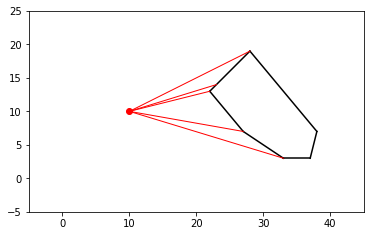

Accepted


In [3]:
from sweep_line_algorithm import *

def build_graph_fast(point, polygon):
    
    # Здесь читателю прдлагается релизовать построение графа видимости с помощью заметающей прямой
    
    # point - точка v из описания алгоритма
    # polygon - массив точек w, образующий полигон
    
    # нужно вернуть массив точек видимых из v
    
    return naive_algorithm(point, polygon) # заглушка

sweep_task(build_graph_fast) 

## Планирование движения
<img src="m_plan.png" style="float: right" />
Рассмотрим задачу нахождения кратчайшего пути, когда движимый объект — это выпуклый полигон. Например, робот, которого надо доставить из начальной в конечную точку.<br>

Если полигон вращать нельзя, задача сводится к движению точки так: выбирается точка на полигоне, которая принимается за начало координат. В такой системе координат для каждого препятствия считается сумма Минковского с полигоном. Получаются бОльшие препятствия, но теперь достаточно двигать выбранную точку, что было описано выше.<br>

Если полигон можно вращать, задача нахождения кратчайшего пути становится достаточно ресурсоёмка, поэтому обычно рассматривают задачу нахождения какого-нибудь пути между конечными точками.<br>

Первый шаг решения этой задачи совпадает с предыдущим случаем: выберем точку и построим сумму Минковского препятствий с полигоном. Рассмотрим малый угол $\varepsilon$. Представим, что поворот полигона на этот угол — это движение вверх-вниз между слоями, на каждом из которых посчитана сумма Минковского с полигоном, повернутым на этот угол.<br>

На каждом слое построим трапецоидную карту и граф, как описано в начале. Если пересечь соседние слои и добавить между их графами ребра, получится один большой граф, в котором ищется кратчайший путь.<br>

При таком подходе может возникнуть ошибка при пересечении слоев: на каждом слое состояния будут допустимые, а осуществить поворот физически будет невозможно. Обычно, эту проблему решают двумя способами: измельчением угла поворота и изначальным сглаживанием углов полигона. Первый способ повышает не только точность решения, но и вычислительную сложность задачи. Второй подход практически исключает возможность нахождения пути, когда его нет, но повышает вероятность "ненахождения" пути, когда он есть.

## Построение навигационного графа на трапецоидной карте

Еще один метод планирования маршрута - применение дорожных карт.<br>

Построим прямоугольник, содержащий внутри себя все многоугольники-препятствия.<br>

<img src="road_mapping_1.png" style="float: center" />

Рассмотрим множество отрезков — рёбер препятствий и построим для него трапецоидальную карту<br>

<img src="road_mapping_2.png" style="float: center" />
А затем удалим из полученной карты все трапецоиды, лежащие внутри препятствий.<br>

<img src="road_mapping_3.png" style="float: right" />
На построение карты требуется время $O(n \log n)$, где $n$ — общее число вершин препятствий. Для того чтобы решить, надо ли удалить трапецоид $T$, достаточно взять ребро top($T$) и проверить, сверху или снизу от него лежит препятствие, граница которого содержит это ребро. Таким образом, на удаление всех лишних трапецоидов потребуется время $O(n)$. <br>

Если стартовая и конечная точка находятся внутри одного трапецоида, то можно пройти из первой точки во вторую по прямой. Если же эти точки лежат в разных трапецоидах, то путь пересечёт несколько трапецоидов, и, вероятно, в некоторых из них мы должны будем делать повороты. 
Построим карту дорог — граф $G$. Вершинами $G$ будут середины отрезков вертикальных линий, проведённых через вершины препятствий, и середины трапецоидов. Две вершины графа $G$ соединены ребром в том и только в том случае, если одна из них является серединой некоторого трапецоида, а другая лежит на вертикальном ребре этого трапецоида. Граф $G$ может быть построен из трапецоидальной карты за время $O(n)$. Заметим, что граф $G$ — плоский граф.<br>

<img src="road_mapping_4.png" style="float: right" />

Так как трапецоидальная карта содержит линейное по $n$ число трапецоидов, и число отрезков вертикальных линий, проведённых через вершины препятствий, также линейно по $n$, то граф $G$ имеет $O(n)$ вершин, а так как он планарен, то число рёбер есть также $O(n)$. Следовательно, поиск в ширину на $G$ можно осуществить за время $O(n)$. Так как для локализации точки в трапецоидальной карте требуется время $O(\log n)$, то для построения пути из точки $s$ в точку $f$ требуется время $O(n)$. Но пути, построенные с помощью дорожных карт, не будут оптимальными. 
